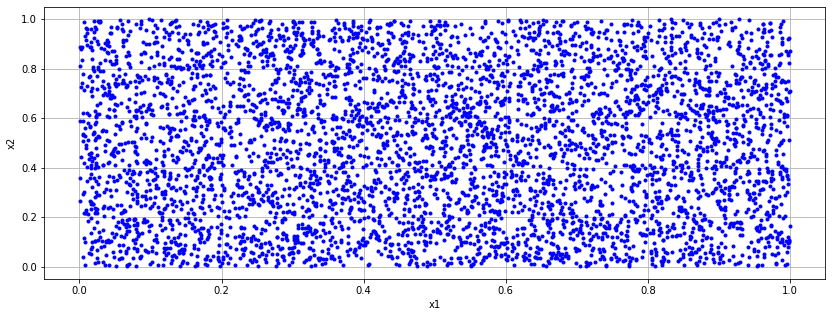

1269
1274
1226
1231
[[0.10234422 0.06128722]
 [0.55187322 0.53087974]
 [0.04289296 0.68032251]
 ...
 [0.54615626 0.52984008]
 [0.73417911 0.61988653]
 [0.24442997 0.26417192]]
Epoch 1/500
30/30 [==============================] - 0s 3ms/step - loss: 1.4829 - accuracy: 0.2000
Epoch 2/500
30/30 [==============================] - 0s 631us/step - loss: 1.4332 - accuracy: 0.2000
Epoch 3/500
30/30 [==============================] - 0s 665us/step - loss: 1.4135 - accuracy: 0.0333
Epoch 4/500
30/30 [==============================] - 0s 812us/step - loss: 1.3913 - accuracy: 0.2667
Epoch 5/500
30/30 [==============================] - 0s 643us/step - loss: 1.3792 - accuracy: 0.3333
Epoch 6/500
30/30 [==============================] - 0s 678us/step - loss: 1.3689 - accuracy: 0.3333
Epoch 7/500
30/30 [==============================] - 0s 661us/step - loss: 1.3639 - accuracy: 0.3333
Epoch 8/500
30/30 [==============================] - 0s 636us/step - loss: 1.3624 - accuracy: 0.3333
Epoch 9/500
30/30 

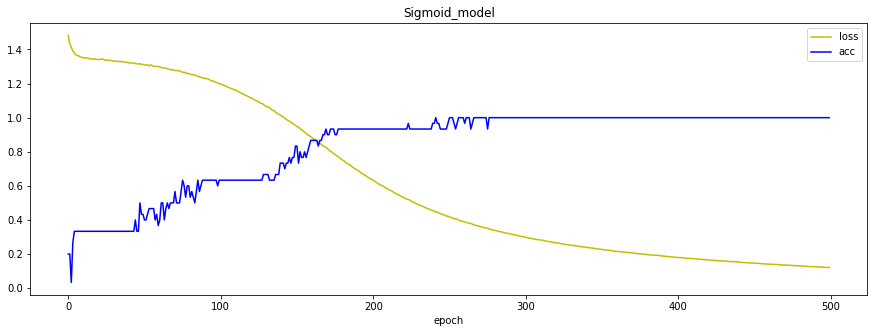

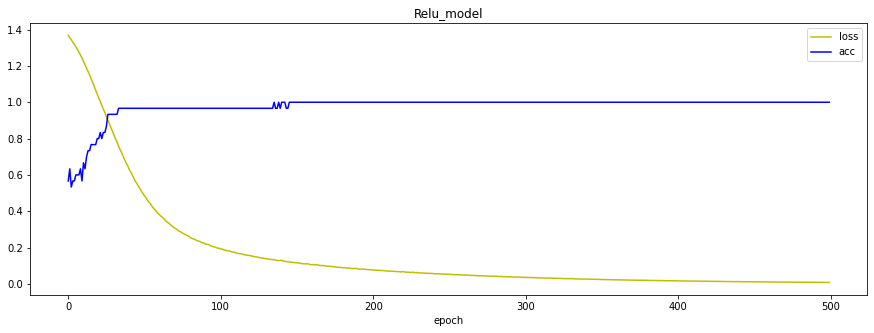

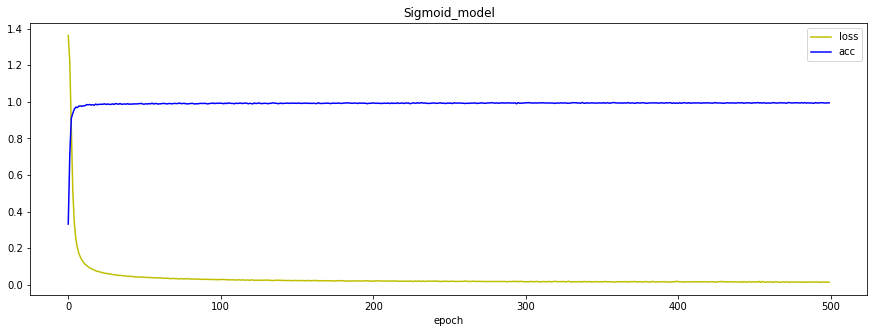

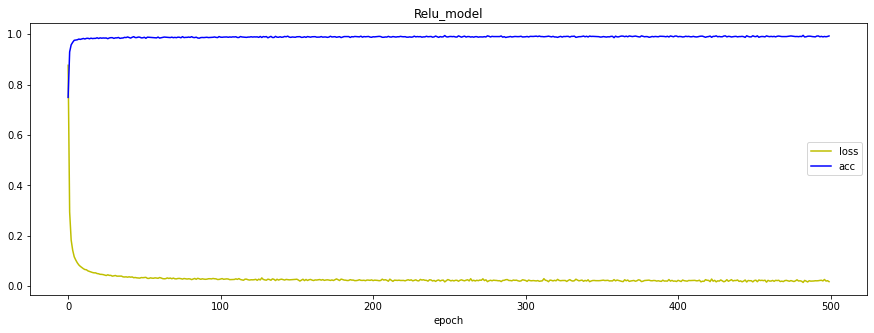

model1 : N 30 sigmoid loss accuracy
4970/4970 [==============================] - 0s 30us/step
[0.25942891593310435, 0.9116700291633606]
model2 : N 30 relu loss accuracy
4970/4970 [==============================] - 0s 31us/step
[0.4515639240338169, 0.8649899363517761]
model3 : N 2500 sigmoid loss accuracy
2500/2500 [==============================] - 0s 34us/step
[0.02145446201580328, 0.991599977016449]
model4 : N 2500 relu loss accuracy
2500/2500 [==============================] - 0s 33us/step
[0.03390297087673496, 0.9864000082015991]


In [ ]:
#1번
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.python.client import device_lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from matplotlib.lines import Line2D  

#데이터 분류 함수
def classify_data(x1,x2) :
  target = []
  for i in range(len(x1)) :
    if x1[i] < 0.5 and x2[i] < 0.5 :
      target.append(0)
    elif x1[i] >= 0.5 and x2[i] < 0.5 :
      target.append(1)
    elif x1[i] < 0.5 and x2[i] >= 0.5 :
      target.append(2)
    elif x1[i] >= 0.5 and x2[i] >= 0.5 :
      target.append(3)
  return np.array(target)
   
#데이터 하나로 합치기(X1,X2를 배열화)
def merge_data(x1,x2) :
  ret = []
  for i in range(len(x1)) :
    ret.append([x1[i],x2[i]])
  return np.array(ret)


x1 = np.random.random(5000)
x2 = np.random.random(5000)

#random하게 나온 값들
plt.figure(figsize=(14,5))
plt.plot(x1,x2,'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

target = classify_data(x1,x2) #분류

#분류된 내용 출력
print(len(target[target == 0]))
print(len(target[target == 1]))
print(len(target[target == 2]))
print(len(target[target == 3]))

#데이터 합병
data = merge_data(x1,x2)
print(data)

encoder = LabelBinarizer() #인코딩
target = encoder.fit_transform(target) #분류된 데이터를 encoding

N = 30
#학습 셋
x_train = data[0:N]
t_train = target[0:N]

#테스트 셋
x_test = data[N :]
t_test = target[N :]

#CPU에서 sigmoid 모델 훈련
with tf.device('cpu:0'):
  model1 = Sequential()
  model1.add(Dense(16,input_dim = 2, activation = 'sigmoid'))
  model1.add(Dense(16,activation = 'sigmoid'))
  model1.add(Dense(4,activation = 'softmax'))
  model1.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist1 = model1.fit(x_train,t_train, epochs = 500, batch_size = 2)

#CPU에서 relu 모델 훈련
with tf.device('cpu:0'):
  model2 = Sequential()
  model2.add(Dense(16,input_dim = 2, activation = 'relu'))
  model2.add(Dense(16,activation = 'relu'))
  model2.add(Dense(4,activation = 'softmax'))
  model2.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist2 = model2.fit(x_train,t_train, epochs = 500, batch_size = 2)

N = 2500
#학습 셋
x1_train = data[0:N]
t1_train = target[0:N]

#테스트 셋
x1_test = data[N :]
t1_test = target[N :]

#CPU에서 sigmoid 모델 훈련
with tf.device('cpu:0'):
  model3 = Sequential()
  model3.add(Dense(16,input_dim = 2, activation = 'sigmoid'))
  model3.add(Dense(16,activation = 'sigmoid'))
  model3.add(Dense(4,activation = 'softmax'))
  model3.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist3 = model3.fit(x1_train,t1_train, epochs = 500, batch_size = 2)

#CPU에서 relu 모델 훈련
with tf.device('cpu:0'):
  model4 = Sequential()
  model4.add(Dense(16,input_dim = 2, activation = 'relu'))
  model4.add(Dense(16,activation = 'relu'))
  model4.add(Dense(4,activation = 'softmax'))
  model4.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist4 = model4.fit(x1_train,t1_train, epochs = 500, batch_size = 2)

#model1의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist1.history['loss'],'y',label = 'loss')
plt.plot(hist1.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc='best')
plt.show()

#model2의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist2.history['loss'],'y',label = 'loss')
plt.plot(hist2.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc='best')
plt.show()

#model3의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist3.history['loss'],'y',label = 'loss')
plt.plot(hist3.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc='best')
plt.show()

#model4의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist4.history['loss'],'y',label = 'loss')
plt.plot(hist4.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc='best')
plt.show()

#model1 오차율 평가 
print("model1 : N 30 sigmoid loss accuracy")
model1_loss_and_metrics = model1.evaluate(x_test,t_test,batch_size =20)
print(model1_loss_and_metrics)
#model2 오차율 평가
print("model2 : N 30 relu loss accuracy")
model2_loss_and_metrics = model2.evaluate(x_test,t_test,batch_size =20)
print(model2_loss_and_metrics)

#model3 오차율 평가 
print("model3 : N 2500 sigmoid loss accuracy")
model3_loss_and_metrics = model3.evaluate(x1_test,t1_test,batch_size =20)
print(model3_loss_and_metrics)
#model4 오차율 평가
print("model4 : N 2500 relu loss accuracy")
model4_loss_and_metrics = model4.evaluate(x1_test,t1_test,batch_size =20)
print(model4_loss_and_metrics)

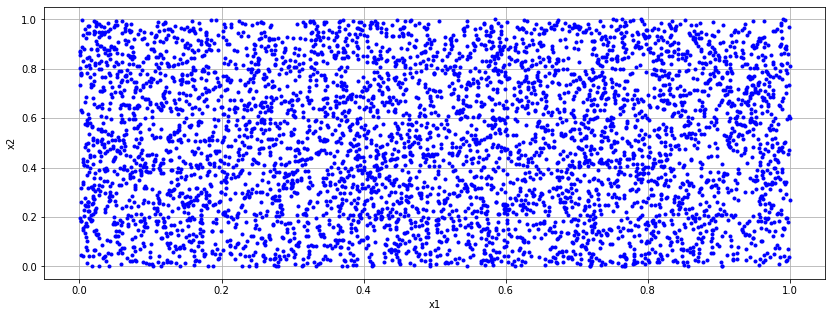

1283
1215
1246
310
[[0.54510257 0.30718746]
 [0.93316373 0.81275713]
 [0.78996536 0.99974736]
 ...
 [0.58552218 0.57797631]
 [0.7570715  0.85177751]
 [0.70428814 0.40542159]]
Epoch 1/50
130/130 [==============================] - 0s 607us/step - loss: 1.9429 - accuracy: 0.0615
Epoch 2/50
130/130 [==============================] - 0s 86us/step - loss: 1.9058 - accuracy: 0.2077
Epoch 3/50
130/130 [==============================] - 0s 84us/step - loss: 1.8720 - accuracy: 0.3077
Epoch 4/50
130/130 [==============================] - 0s 96us/step - loss: 1.8458 - accuracy: 0.3077
Epoch 5/50
130/130 [==============================] - 0s 84us/step - loss: 1.8223 - accuracy: 0.3077
Epoch 6/50
130/130 [==============================] - 0s 84us/step - loss: 1.8059 - accuracy: 0.3077
Epoch 7/50
130/130 [==============================] - 0s 81us/step - loss: 1.7906 - accuracy: 0.3077
Epoch 8/50
130/130 [==============================] - 0s 77us/step - loss: 1.7792 - accuracy: 0.3077
Epoch 9/50
130/1

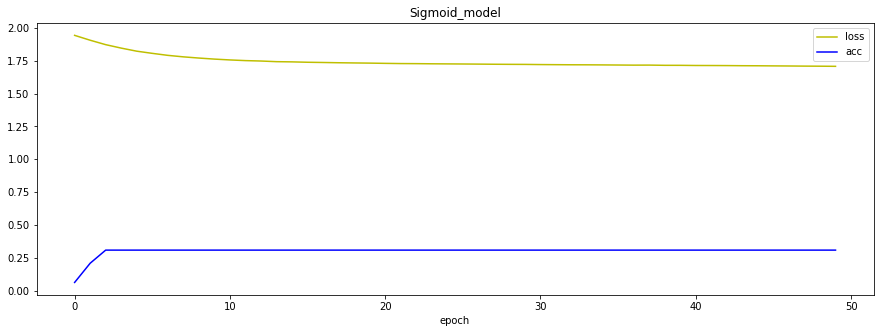

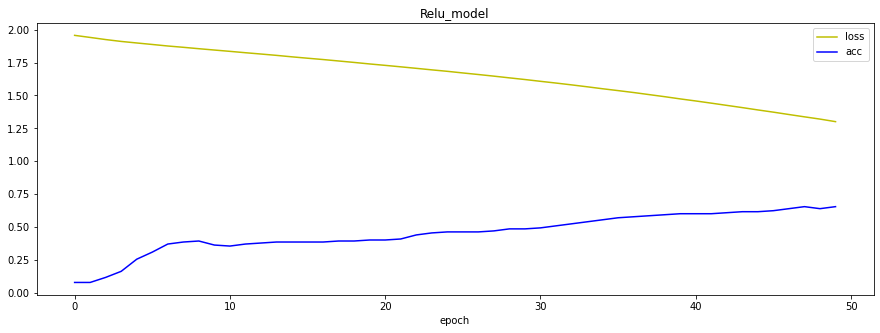

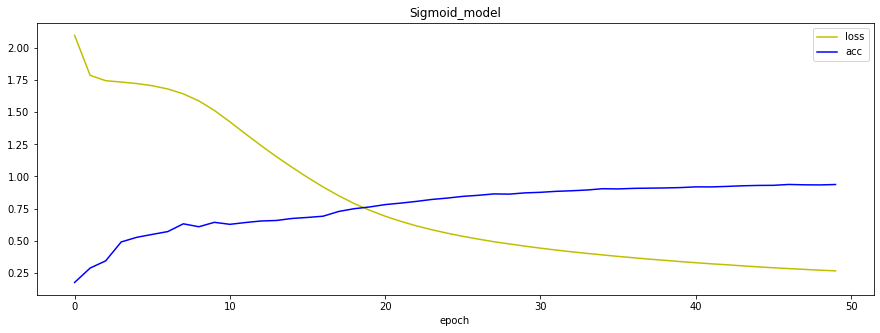

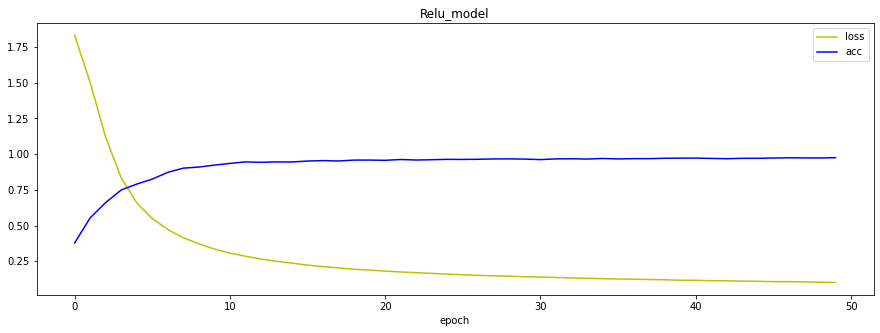

model1 : N 130 sigmoid loss accuracy
4870/4870 [==============================] - 0s 31us/step
[1.755102019290415, 0.2552361488342285]
model2 : N 130 relu loss accuracy
4870/4870 [==============================] - 0s 30us/step
[1.2661370846769893, 0.641478419303894]
model3 : N 2500 sigmoid loss accuracy
2500/2500 [==============================] - 0s 35us/step
[0.25169346171617507, 0.9416000247001648]
model4 : N 2500 relu loss accuracy
2500/2500 [==============================] - 0s 34us/step
[0.10609114133566618, 0.9635999798774719]


In [ ]:
#2번
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.python.client import device_lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from matplotlib.lines import Line2D  

#데이터 분류 함수
def classify_data(x1,x2) :
  target = []
  for i in range(len(x1)) :
    if x1[i] < 0.5 and x2[i] < 0.5 :
      target.append(0)
    elif x1[i] >= 0.5 and x2[i] < 0.5 :
      target.append(1)
    elif x1[i] < 0.5 and x2[i] >= 0.5 :
      target.append(2)
    elif x1[i] >= 0.5 and x1[i] < 0.75 and x2[i] >= 0.5 and x2[i] < 0.75 :
      target.append(3)
    elif x1[i] >= 0.5 and x1[i] < 0.75 and x2[i] >= 0.75 :
      target.append(4)
    elif x1[i] >= 0.75 and x2[i] >= 0.5 and x2[i] < 0.75 :
      target.append(5)
    elif x1[i] >= 0.75 and x2[i] >= 0.75 :
      target.append(6)
  return np.array(target)

   
#데이터 하나로 합치기(X1,X2를 배열화)
def merge_data(x1,x2) :
  ret = []
  for i in range(len(x1)) :
    ret.append([x1[i],x2[i]])
  return np.array(ret)


x1 = np.random.random(5000)
x2 = np.random.random(5000)

#random하게 나온 값들
plt.figure(figsize=(14,5))
plt.plot(x1,x2,'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

target = classify_data(x1,x2) #분류

#분류된 내용 출력
print(len(target[target == 0]))
print(len(target[target == 1]))
print(len(target[target == 2]))
print(len(target[target == 3]))

#데이터 합병
data = merge_data(x1,x2)
print(data)

encoder = LabelBinarizer() #인코딩
target = encoder.fit_transform(target) #분류된 데이터를 encoding

N = 130
#학습 셋
x_train = data[0:N]
t_train = target[0:N]

#테스트 셋
x_test = data[N :]
t_test = target[N :]

#CPU에서 sigmoid 모델 훈련
with tf.device('cpu:0'):
  model1 = Sequential()
  model1.add(Dense(16,input_dim = 2, activation = 'sigmoid'))
  model1.add(Dense(16,activation = 'sigmoid'))
  model1.add(Dense(7,activation = 'softmax'))
  model1.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist1 = model1.fit(x_train,t_train,epochs = 50,batch_size = 20)

#CPU에서 relu 모델 훈련
with tf.device('cpu:0'):
  model2 = Sequential()
  model2.add(Dense(16,input_dim = 2, activation = 'relu'))
  model2.add(Dense(16,activation = 'relu'))
  model2.add(Dense(7,activation = 'softmax'))
  model2.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist2 = model2.fit(x_train,t_train,epochs = 50,batch_size = 20)

N = 2500
#학습 셋
x1_train = data[0:N]
t1_train = target[0:N]

#테스트 셋
x1_test = data[N :]
t1_test = target[N :]

#CPU에서 sigmoid 모델 훈련
with tf.device('cpu:0'):
  model3 = Sequential()
  model3.add(Dense(16,input_dim = 2, activation = 'sigmoid'))
  model3.add(Dense(16,activation = 'sigmoid'))
  model3.add(Dense(7,activation = 'softmax'))
  model3.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist3 = model3.fit(x1_train,t1_train,epochs = 50,batch_size = 20)

#CPU에서 relu 모델 훈련
with tf.device('cpu:0'):
  model4 = Sequential()
  model4.add(Dense(16,input_dim = 2, activation = 'relu'))
  model4.add(Dense(16,activation = 'relu'))
  model4.add(Dense(7,activation = 'softmax'))
  model4.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist4 = model4.fit(x1_train,t1_train,epochs = 50,batch_size = 20)

#model1의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist1.history['loss'],'y',label = 'loss')
plt.plot(hist1.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc='best')
plt.show()

#model2의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist2.history['loss'],'y',label = 'loss')
plt.plot(hist2.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc='best')
plt.show()

#model3의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist3.history['loss'],'y',label = 'loss')
plt.plot(hist3.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc='best')
plt.show()

#model4의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist4.history['loss'],'y',label = 'loss')
plt.plot(hist4.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc='best')
plt.show()

#model1 오차율 평가 
print("model1 : N 130 sigmoid loss accuracy")
model1_loss_and_metrics = model1.evaluate(x_test,t_test,batch_size =20)
print(model1_loss_and_metrics)
#model2 오차율 평가
print("model2 : N 130 relu loss accuracy")
model2_loss_and_metrics = model2.evaluate(x_test,t_test,batch_size =20)
print(model2_loss_and_metrics)

#model3 오차율 평가 
print("model3 : N 2500 sigmoid loss accuracy")
model3_loss_and_metrics = model3.evaluate(x1_test,t1_test,batch_size =20)
print(model3_loss_and_metrics)
#model4 오차율 평가
print("model4 : N 2500 relu loss accuracy")
model4_loss_and_metrics = model4.evaluate(x1_test,t1_test,batch_size =20)
print(model4_loss_and_metrics)



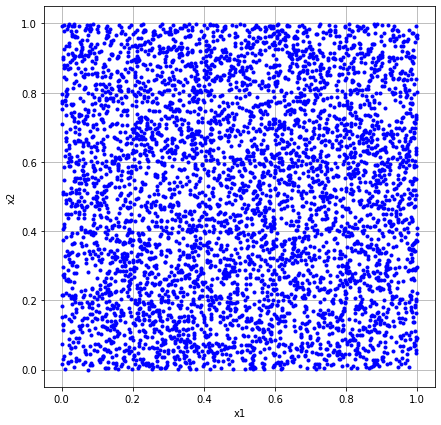

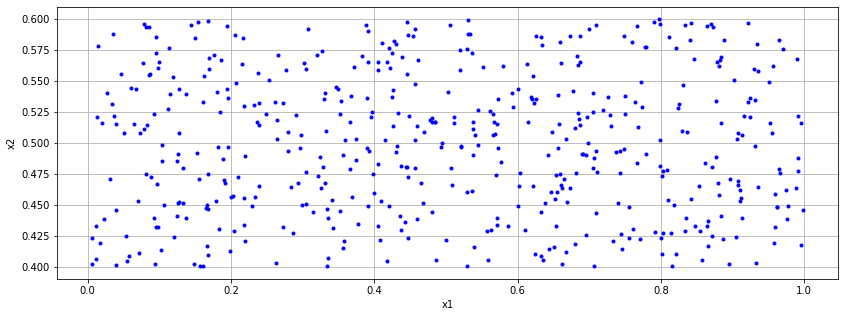

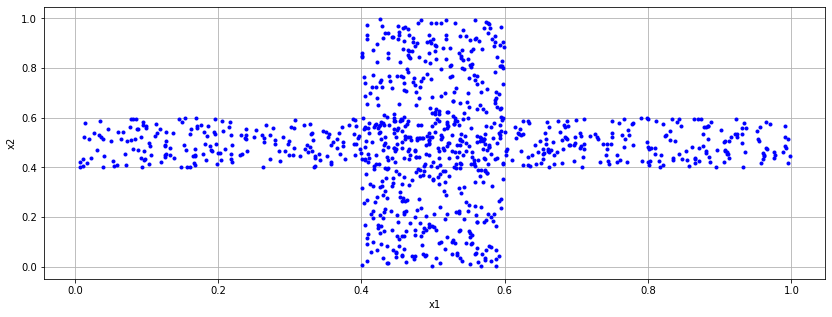

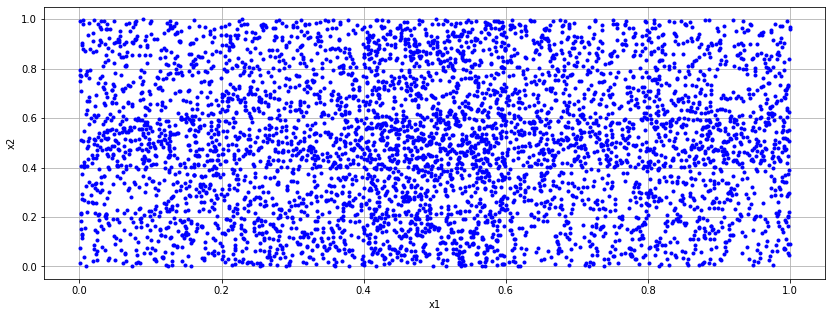

1268
1206
1222
1304
Epoch 1/500
1000/1000 [==============================] - 1s 601us/step - loss: 1.3965 - accuracy: 0.2710
Epoch 2/500
1000/1000 [==============================] - 1s 509us/step - loss: 1.3709 - accuracy: 0.3130
Epoch 3/500
1000/1000 [==============================] - 1s 516us/step - loss: 1.3410 - accuracy: 0.4220
Epoch 4/500
1000/1000 [==============================] - 1s 534us/step - loss: 1.2897 - accuracy: 0.4930
Epoch 5/500
1000/1000 [==============================] - 1s 515us/step - loss: 1.1927 - accuracy: 0.6940
Epoch 6/500
1000/1000 [==============================] - 1s 520us/step - loss: 1.0443 - accuracy: 0.7900
Epoch 7/500
1000/1000 [==============================] - 1s 527us/step - loss: 0.8773 - accuracy: 0.8230
Epoch 8/500
1000/1000 [==============================] - 1s 530us/step - loss: 0.7224 - accuracy: 0.8720
Epoch 9/500
1000/1000 [==============================] - 1s 513us/step - loss: 0.5946 - accuracy: 0.9000
Epoch 10/500
1000/1000 [===========

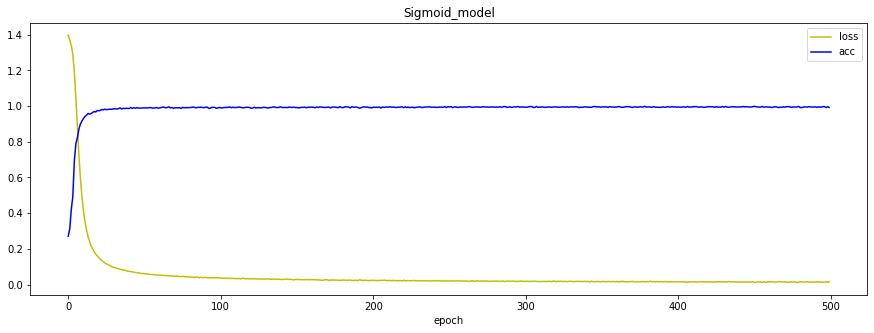

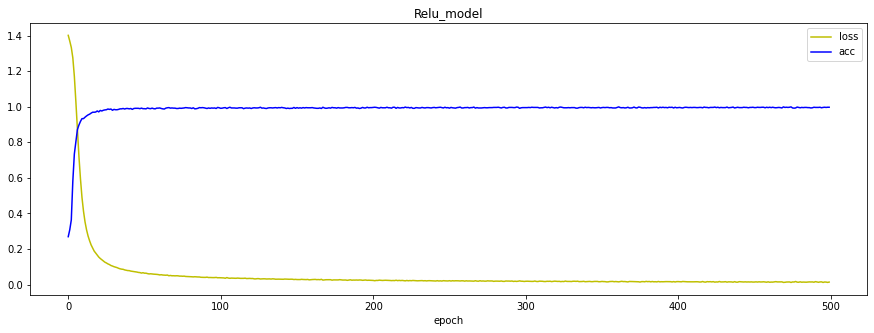

model1 : N 1000 sigmoid loss accuracy
4000/4000 [==============================] - 0s 36us/step
[0.020274292244435763, 0.9919999837875366]
model2 : N 1000 relu loss accuracy
4000/4000 [==============================] - 0s 36us/step
[0.020158946323288306, 0.9927499890327454]
Epoch 1/500
1000/1000 [==============================] - 1s 1ms/step - loss: 1.3855 - accuracy: 0.2630
Epoch 2/500
1000/1000 [==============================] - 1s 786us/step - loss: 1.3667 - accuracy: 0.3140
Epoch 3/500
1000/1000 [==============================] - 1s 559us/step - loss: 1.3398 - accuracy: 0.4030
Epoch 4/500
1000/1000 [==============================] - 1s 556us/step - loss: 1.2986 - accuracy: 0.4550
Epoch 5/500
1000/1000 [==============================] - 1s 604us/step - loss: 1.2195 - accuracy: 0.5120
Epoch 6/500
1000/1000 [==============================] - 1s 601us/step - loss: 1.1193 - accuracy: 0.5390
Epoch 7/500
1000/1000 [==============================] - 1s 553us/step - loss: 1.0152 - accuracy:

In [ ]:
#3번
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.python.client import device_lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from matplotlib.lines import Line2D  

#데이터 분류 함수
def classify_data(x1,x2) :
  target = []
  for i in range(len(x1)) :
    if x1[i] < 0.5 and x2[i] < 0.5 :
      target.append(0)
    elif x1[i] >= 0.5 and x2[i] < 0.5 :
      target.append(1)
    elif x1[i] < 0.5 and x2[i] >= 0.5 :
      target.append(2)
    elif x1[i] >= 0.5 and x2[i] >= 0.5 :
      target.append(3)
  return np.array(target)
   
#데이터 하나로 합치기(X1,X2를 배열화)
def merge_data(x1,x2) :
  ret = []
  for i in range(len(x1)) :
    ret.append([x1[i],x2[i]])
  return np.array(ret)

#랜덤 생성
x1 = np.random.random(5000)
x2 =  np.random.random(5000)

#random하게 나온 값들 -> 전체셋
plt.figure(figsize=(7,7))
plt.plot(x1,x2,'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

target = classify_data(x1,x2) #분류
data = merge_data(x1,x2)
x2[0:500]  = np.random.uniform(0.4,0.6,500)
target_500 = classify_data(x1,x2) #500개 경계선
data_500 = merge_data(x1,x2)

#random하게 나온 값들 -> 500개의 데이터 
plt.figure(figsize=(14,5))
plt.plot(x1[:500],x2[:500],'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

x1[500:1000] = np.random.uniform(0.4,0.6,500)
target_1000 = classify_data(x1,x2) #1000개 경계선
data_1000 = merge_data(x1,x2)

#random하게 나온 값들
plt.figure(figsize=(14,5))
plt.plot(x1[:1000],x2[:1000],'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

#random하게 나온 값들
plt.figure(figsize=(14,5))
plt.plot(x1,x2,'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()
#분류된 내용 출력
print(len(target[target == 0]))
print(len(target[target == 1]))
print(len(target[target == 2]))
print(len(target[target == 3]))

encoder = LabelBinarizer() #인코딩
target = encoder.fit_transform(target) #분류된 데이터를 encoding
target_500 = encoder.fit_transform(target_500) #분류된 데이터를 encoding
target_1000 = encoder.fit_transform(target_1000) #분류된 데이터를 encoding

N = 1000
#랜덤 1000개 학습 셋
x_train = data[0:N]
t_train = target[0:N]
x_test = data[N :]
t_test = target[N :]

#경계선 500개 학습 셋
x_train500 = data_500[0:N]
t_train500 = target_500[0:N]
x_test500 = data_500[N :]
t_test500 = target_500[N :]

#경계선 1000개 학습 셋
x_train1000 = data_1000[0:N]
t_train1000 = target_1000[0:N]
x_test1000 = data_1000[N :]
t_test1000 = target_1000[N :]

xtrain_set = [x_train,x_train500,x_train1000]
ttrain_set = [t_train,t_train500,t_train1000]
xtest_set = [x_test,x_test500,x_test1000]
ttest_set = [t_test,t_test500,t_test1000]

#CPU에서 sigmoid 모델 훈련
for i in range(0,3) :
  
  with tf.device('cpu:0'):
    model1 = Sequential()
    model1.add(Dense(16,input_dim = 2, activation = 'sigmoid'))
    model1.add(Dense(16,activation = 'sigmoid'))
    model1.add(Dense(4,activation = 'softmax'))
    model1.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    hist1 = model1.fit(xtrain_set[i],ttrain_set[i], epochs = 500, batch_size = 2)

#CPU에서 relu 모델 훈련
  with tf.device('cpu:0'):
    model2 = Sequential()
    model2.add(Dense(16,input_dim = 2, activation = 'sigmoid'))
    model2.add(Dense(16,activation = 'sigmoid'))
    model2.add(Dense(4,activation = 'softmax'))
    model2.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    hist2 = model2.fit(xtrain_set[i],ttrain_set[i], epochs = 500, batch_size = 2)

  #model1의 학습과정 그래프
  plt.figure(figsize = (15,5))
  plt.plot(hist1.history['loss'],'y',label = 'loss')
  plt.plot(hist1.history['accuracy'],'b',label = 'acc')
  plt.xlabel('epoch')
  plt.title('Sigmoid_model')
  plt.legend(loc='best')
  plt.show()
  
  #model2의 학습과정 그래프
  plt.figure(figsize = (15,5))
  plt.plot(hist2.history['loss'],'y',label = 'loss')
  plt.plot(hist2.history['accuracy'],'b',label = 'acc')
  plt.xlabel('epoch')
  plt.title('Relu_model')
  plt.legend(loc='best')
  plt.show()

  #model1 오차율 평가 
  print("model1 : N 1000 sigmoid loss accuracy")
  model1_loss_and_metrics = model1.evaluate(xtest_set[i],ttest_set[i],batch_size =20)
  print(model1_loss_and_metrics)
  #model2 오차율 평가
  print("model2 : N 1000 relu loss accuracy")
  model2_loss_and_metrics = model2.evaluate(xtest_set[i],ttest_set[i],batch_size =20)
  print(model2_loss_and_metrics)


Using TensorFlow backend.


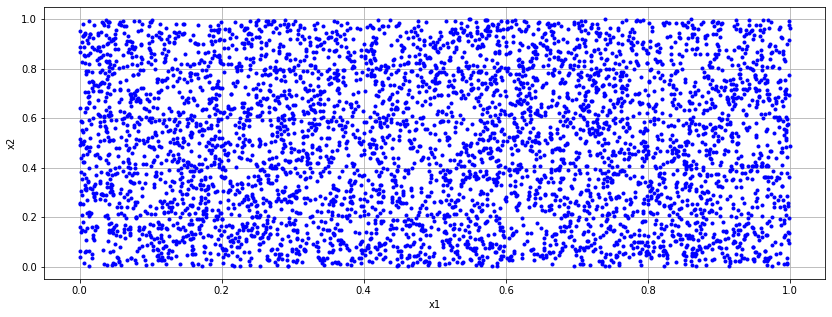

1271
1242
1231
1256
[[0.50762269 0.94955559]
 [0.0733991  0.90816251]
 [0.13319673 0.58964486]
 ...
 [0.39639279 0.09793007]
 [0.13357544 0.43662545]
 [0.35650179 0.24778998]]
Epoch 1/50
30/30 [==============================] - 0s 3ms/step - loss: 1.7569 - accuracy: 0.1000
Epoch 2/50
30/30 [==============================] - 0s 604us/step - loss: 1.7439 - accuracy: 0.1000
Epoch 3/50
30/30 [==============================] - 0s 608us/step - loss: 1.7318 - accuracy: 0.1000
Epoch 4/50
30/30 [==============================] - 0s 596us/step - loss: 1.7201 - accuracy: 0.2000
Epoch 5/50
30/30 [==============================] - 0s 535us/step - loss: 1.7081 - accuracy: 0.2667
Epoch 6/50
30/30 [==============================] - 0s 597us/step - loss: 1.6968 - accuracy: 0.2667
Epoch 7/50
30/30 [==============================] - 0s 527us/step - loss: 1.6866 - accuracy: 0.2667
Epoch 8/50
30/30 [==============================] - 0s 707us/step - loss: 1.6752 - accuracy: 0.2667
Epoch 9/50
30/30 [========

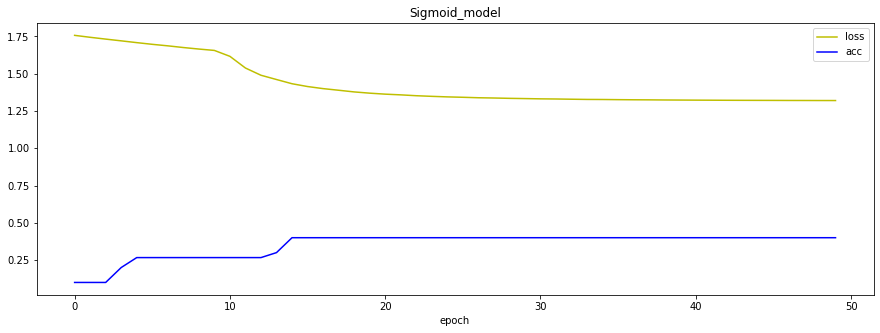

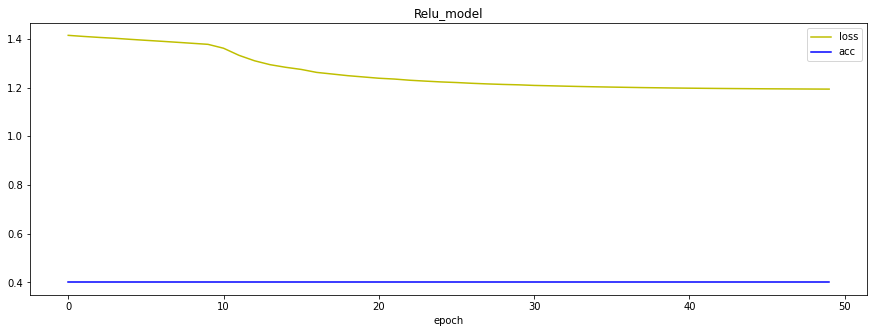

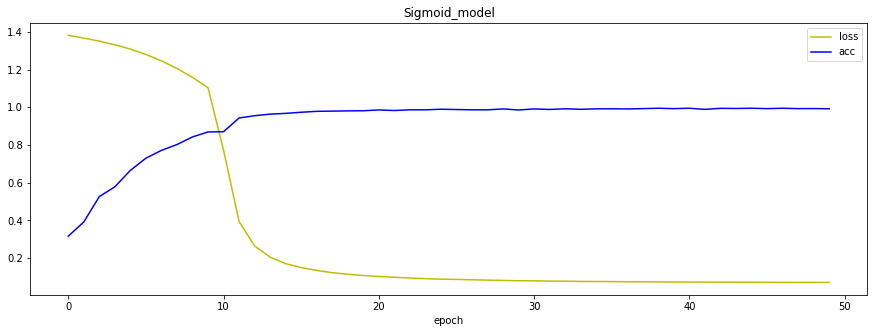

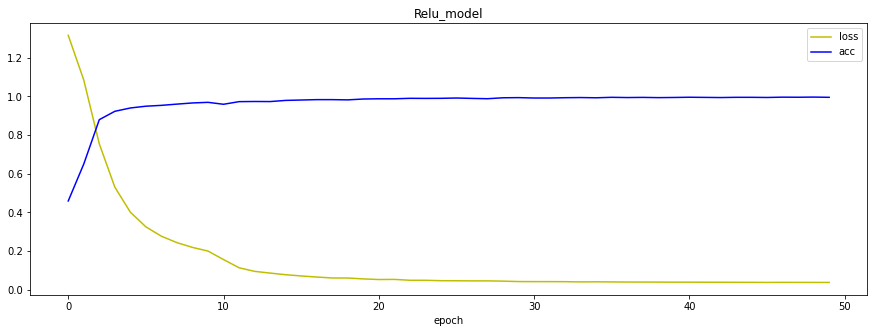

model1 : N 30 sigmoid loss accuracy
4970/4970 [==============================] - 0s 28us/step
[1.485403619062013, 0.24748490750789642]
model2 : N 30 relu loss accuracy
4970/4970 [==============================] - 0s 29us/step
[1.3460419271553545, 0.24748490750789642]
model3 : N 2500 sigmoid loss accuracy
2500/2500 [==============================] - 0s 32us/step
[0.06802959919720888, 0.9955999851226807]
model4 : N 2500 relu loss accuracy
2500/2500 [==============================] - 0s 32us/step
[0.03643387084826827, 0.996399998664856]


In [ ]:
#4번
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.python.client import device_lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from matplotlib.lines import Line2D  

def scheduler(epoch):
  if epoch < 10 :
    return 0.0001
  else:
    return 0.001 * tf.math.exp(0.1 *(10-epoch))

#데이터 분류 함수
def classify_data(x1,x2) :
  target = []
  for i in range(len(x1)) :
    if x1[i] < 0.5 and x2[i] < 0.5 :
      target.append(0)
    elif x1[i] >= 0.5 and x2[i] < 0.5 :
      target.append(1)
    elif x1[i] < 0.5 and x2[i] >= 0.5 :
      target.append(2)
    elif x1[i] >= 0.5 and x2[i] >= 0.5 :
      target.append(3)
  return np.array(target)
   
#데이터 하나로 합치기(X1,X2를 배열화)
def merge_data(x1,x2) :
  ret = []
  for i in range(len(x1)) :
    ret.append([x1[i],x2[i]])
  return np.array(ret)


x1 = np.random.random(5000)
x2 = np.random.random(5000)

#random하게 나온 값들 -> 전체셋
plt.figure(figsize=(14,5))
plt.plot(x1,x2,'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

target = classify_data(x1,x2) #분류

#분류된 내용 출력
print(len(target[target == 0]))
print(len(target[target == 1]))
print(len(target[target == 2]))
print(len(target[target == 3]))

#데이터 합병
data = merge_data(x1,x2)
print(data)

encoder = LabelBinarizer() #인코딩
target = encoder.fit_transform(target) #분류된 데이터를 encoding

N = 30
#학습 셋
x_train = data[0:N]
t_train = target[0:N]

#테스트 셋
x_test = data[N :]
t_test = target[N :]

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
#CPU에서 sigmoid 모델 훈련
with tf.device('cpu:0'):
  model1 = Sequential()
  model1.add(Dense(16,input_dim = 2, activation = 'sigmoid'))
  model1.add(Dense(16,activation = 'sigmoid'))
  model1.add(Dense(4,activation = 'softmax'))
  model1.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist1 = model1.fit(x_train,t_train, epochs = 50, batch_size = 2,callbacks=[callback])

#CPU에서 relu 모델 훈련
with tf.device('cpu:0'):
  model2 = Sequential()
  model2.add(Dense(16,input_dim = 2, activation = 'relu'))
  model2.add(Dense(16,activation = 'relu'))
  model2.add(Dense(4,activation = 'softmax'))
  model2.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist2 = model2.fit(x_train,t_train, epochs = 50, batch_size = 2,callbacks=[callback])

N = 2500
#학습 셋
x1_train = data[0:N]
t1_train = target[0:N]

#테스트 셋
x1_test = data[N :]
t1_test = target[N :]

#CPU에서 sigmoid 모델 훈련
with tf.device('cpu:0'):
  model3 = Sequential()
  model3.add(Dense(128,input_dim = 2, activation = 'sigmoid'))
  model3.add(Dense(16,activation = 'sigmoid'))
  model3.add(Dense(4,activation = 'softmax'))
  model3.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist3 = model3.fit(x1_train,t1_train,epochs = 50, batch_size = 2,callbacks=[callback])

#CPU에서 relu 모델 훈련
with tf.device('cpu:0'):
  model4 = Sequential()
  model4.add(Dense(128,input_dim = 2, activation = 'relu'))
  model4.add(Dense(16,activation = 'relu'))
  model4.add(Dense(4,activation = 'softmax'))
  model4.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist4 = model4.fit(x1_train,t1_train, epochs = 50, batch_size = 2,callbacks=[callback])

#model1의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist1.history['loss'],'y',label = 'loss')
plt.plot(hist1.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc='best')
plt.show()

#model2의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist2.history['loss'],'y',label = 'loss')
plt.plot(hist2.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc='best')
plt.show()

#model3의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist3.history['loss'],'y',label = 'loss')
plt.plot(hist3.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc='best')
plt.show()

#model4의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist4.history['loss'],'y',label = 'loss')
plt.plot(hist4.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc='best')
plt.show()

#model1 오차율 평가 
print("model1 : N 30 sigmoid loss accuracy")
model1_loss_and_metrics = model1.evaluate(x_test,t_test,batch_size =20)
print(model1_loss_and_metrics)
#model2 오차율 평가
print("model2 : N 30 relu loss accuracy")
model2_loss_and_metrics = model2.evaluate(x_test,t_test,batch_size =20)
print(model2_loss_and_metrics)

#model3 오차율 평가 
print("model3 : N 2500 sigmoid loss accuracy")
model3_loss_and_metrics = model3.evaluate(x1_test,t1_test,batch_size =20)
print(model3_loss_and_metrics)
#model4 오차율 평가
print("model4 : N 2500 relu loss accuracy")
model4_loss_and_metrics = model4.evaluate(x1_test,t1_test,batch_size =20)
print(model4_loss_and_metrics)

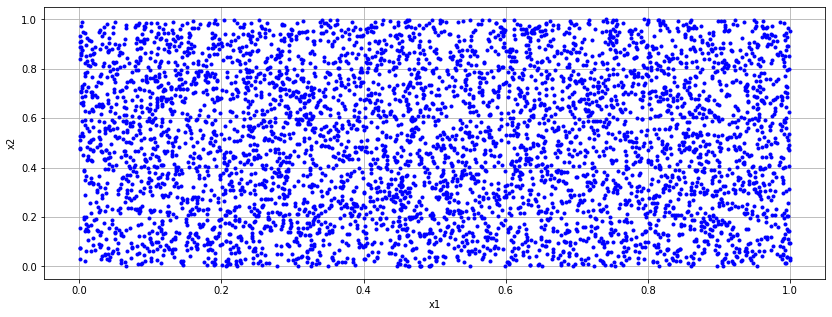

1242
1243
1286
1229
[[0.06531407 0.589489  ]
 [0.45528818 0.47104113]
 [0.75450865 0.32030636]
 ...
 [0.15360206 0.42443661]
 [0.67079642 0.38443975]
 [0.86455956 0.88121949]]
Epoch 1/200
30/30 [==============================] - 0s 2ms/step - loss: 1.4185 - accuracy: 0.3000
Epoch 2/200
30/30 [==============================] - 0s 114us/step - loss: 1.4122 - accuracy: 0.3000
Epoch 1/200
30/30 [==============================] - 0s 2ms/step - loss: 1.3349 - accuracy: 0.4000
Epoch 2/200
30/30 [==============================] - 0s 113us/step - loss: 1.3291 - accuracy: 0.4333
Epoch 3/200
30/30 [==============================] - 0s 118us/step - loss: 1.3241 - accuracy: 0.4333
Epoch 1/200
2500/2500 [==============================] - 0s 86us/step - loss: 1.4135 - accuracy: 0.2596
Epoch 2/200
2500/2500 [==============================] - 0s 56us/step - loss: 1.3757 - accuracy: 0.3044
Epoch 3/200
2500/2500 [==============================] - 0s 55us/step - loss: 1.3622 - accuracy: 0.4180
Epoch 4/200

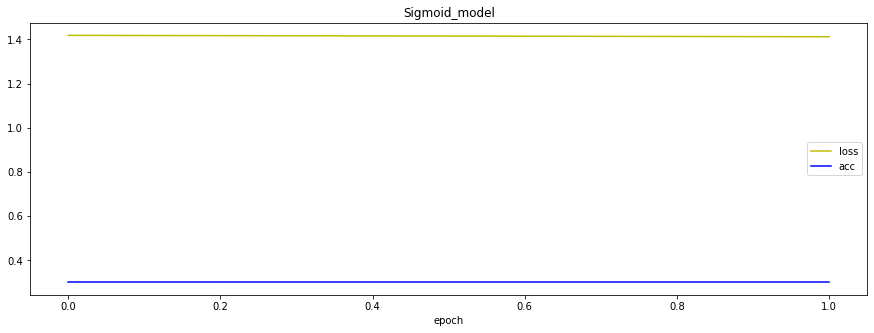

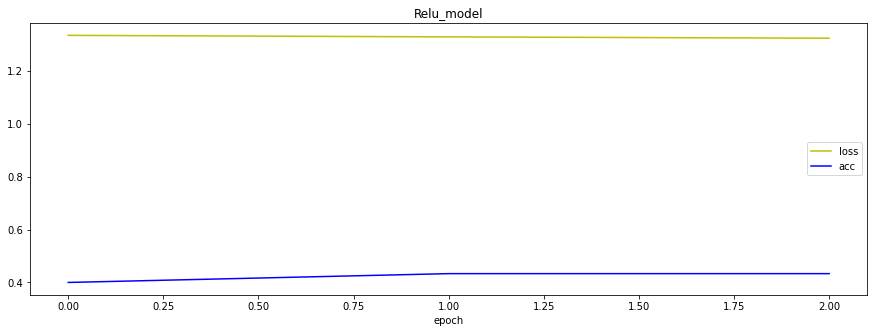

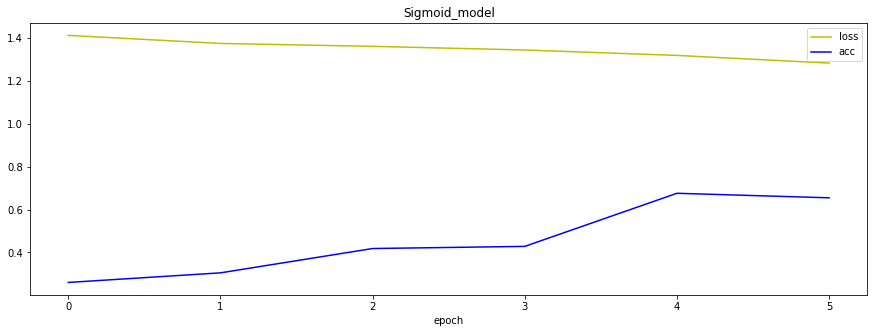

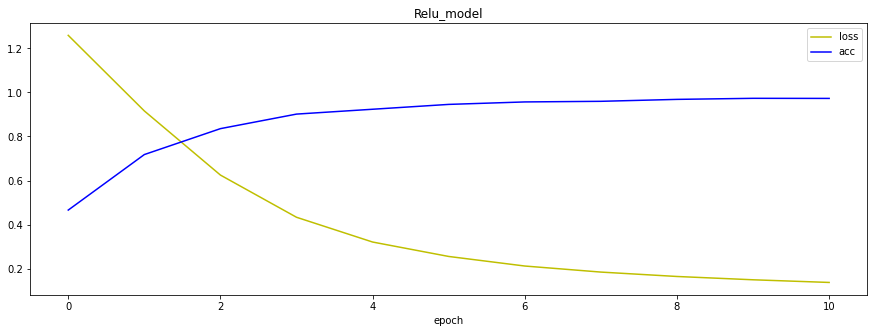

model1 : N 30 sigmoid loss accuracy
4970/4970 [==============================] - 0s 29us/step
[1.4456847901315517, 0.24828973412513733]
model2 : N 30 relu loss accuracy
4970/4970 [==============================] - 0s 29us/step
[1.3194547515040191, 0.4468812942504883]
model3 : N 2500 sigmoid loss accuracy
2500/2500 [==============================] - 0s 32us/step
[1.264178928375244, 0.6643999814987183]
model4 : N 2500 relu loss accuracy
2500/2500 [==============================] - 0s 31us/step
[0.13618986485898496, 0.979200005531311]


In [ ]:
#5번
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.python.client import device_lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from matplotlib.lines import Line2D 
from tensorflow.python.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


#데이터 분류 함수
def classify_data(x1,x2) :
  target = []
  for i in range(len(x1)) :
    if x1[i] < 0.5 and x2[i] < 0.5 :
      target.append(0)
    elif x1[i] >= 0.5 and x2[i] < 0.5 :
      target.append(1)
    elif x1[i] < 0.5 and x2[i] >= 0.5 :
      target.append(2)
    elif x1[i] >= 0.5 and x2[i] >= 0.5 :
      target.append(3)
  return np.array(target)
   
#데이터 하나로 합치기(X1,X2를 배열화)
def merge_data(x1,x2) :
  ret = []
  for i in range(len(x1)) :
    ret.append([x1[i],x2[i]])
  return np.array(ret)


x1 = np.random.random(5000)
x2 = np.random.random(5000)

#random하게 나온 값들
plt.figure(figsize=(14,5))
plt.plot(x1,x2,'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

target = classify_data(x1,x2) #분류

#분류된 내용 출력
print(len(target[target == 0]))
print(len(target[target == 1]))
print(len(target[target == 2]))
print(len(target[target == 3]))

#데이터 합병
data = merge_data(x1,x2)
print(data)

encoder = LabelBinarizer() #인코딩
target = encoder.fit_transform(target) #분류된 데이터를 encoding

N = 30
#학습 셋
x_train = data[0:N]
t_train = target[0:N]

#테스트 셋
x_test = data[N :]
t_test = target[N :]
early_stopping = EarlyStopping(monitor='accuracy')
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='min', save_best_only=True)

#CPU에서 sigmoid 모델 훈련
with tf.device('cpu:0'):
  model1 = Sequential()
  model1.add(Dense(16,input_dim = 2, activation = 'sigmoid'))
  model1.add(Dense(16,activation = 'sigmoid'))
  model1.add(Dense(4,activation = 'softmax'))
  model1.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist1 = model1.fit(x_train,t_train,epochs = 200,batch_size = 20,callbacks=[early_stopping,mc])

#CPU에서 relu 모델 훈련
with tf.device('cpu:0'):
  model2 = Sequential()
  model2.add(Dense(16,input_dim = 2, activation = 'relu'))
  model2.add(Dense(16,activation = 'relu'))
  model2.add(Dense(4,activation = 'softmax'))
  model2.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist2 = model2.fit(x_train,t_train,epochs = 200,batch_size = 20,callbacks=[early_stopping,mc])

N = 2500
#학습 셋
x1_train = data[0:N]
t1_train = target[0:N]

#테스트 셋
x1_test = data[N :]
t1_test = target[N :]

#CPU에서 sigmoid 모델 훈련
with tf.device('cpu:0'):
  model3 = Sequential()
  model3.add(Dense(16,input_dim = 2, activation = 'sigmoid'))
  model3.add(Dense(16,activation = 'sigmoid'))
  model3.add(Dense(4,activation = 'softmax'))
  model3.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist3 = model3.fit(x1_train,t1_train,epochs = 200,batch_size = 20,callbacks=[early_stopping,mc])

#CPU에서 relu 모델 훈련
with tf.device('cpu:0'):
  model4 = Sequential()
  model4.add(Dense(16,input_dim = 2, activation = 'relu'))
  model4.add(Dense(16,activation = 'relu'))
  model4.add(Dense(4,activation = 'softmax'))
  model4.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  hist4 = model4.fit(x1_train,t1_train,epochs = 200,batch_size = 20,callbacks=[early_stopping,mc])

#model1의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist1.history['loss'],'y',label = 'loss')
plt.plot(hist1.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc='best')
plt.show()

#model2의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist2.history['loss'],'y',label = 'loss')
plt.plot(hist2.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc='best')
plt.show()

#model3의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist3.history['loss'],'y',label = 'loss')
plt.plot(hist3.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc='best')
plt.show()

#model4의 학습과정 그래프
plt.figure(figsize = (15,5))
plt.plot(hist4.history['loss'],'y',label = 'loss')
plt.plot(hist4.history['accuracy'],'b',label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc='best')
plt.show()

#model1 오차율 평가 
print("model1 : N 30 sigmoid loss accuracy")
model1_loss_and_metrics = model1.evaluate(x_test,t_test,batch_size =20)
print(model1_loss_and_metrics)
#model2 오차율 평가
print("model2 : N 30 relu loss accuracy")
model2_loss_and_metrics = model2.evaluate(x_test,t_test,batch_size =20)
print(model2_loss_and_metrics)

#model3 오차율 평가 
print("model3 : N 2500 sigmoid loss accuracy")
model3_loss_and_metrics = model3.evaluate(x1_test,t1_test,batch_size =20)
print(model3_loss_and_metrics)
#model4 오차율 평가
print("model4 : N 2500 relu loss accuracy")
model4_loss_and_metrics = model4.evaluate(x1_test,t1_test,batch_size =20)
print(model4_loss_and_metrics)